# Esercitazione 4

In [1]:
import networkx as nx
import copy

In [2]:
def drawGraph(graph):
    G = nx.Graph(graph)
    nx.draw_networkx(G, pos=nx.planar_layout(G))

def drawDiGraph(di_graph):
    G = nx.DiGraph(di_graph)
    nx.draw_networkx(G, pos=nx.planar_layout(G))

## Es. 1. Dijkstra non dà risultati corretti con pesi negativi

**Testo**

Sia G = (V,E) un qualsiasi grafo orientato con pesi sugli archi, pesi che possono essere anche negativi ma in cui non sono presenti cicli di peso negativo. 
1. Dimostrare che l’algoritmo di Dijkstra su grafi di questo tipo non calcola necessariamente i cammini di costo minimo tra la sorgente e gli altri nodi del grafo.
2. Per il calcolo dei cammini di costo minimo in G si suggerisce il seguente algoritmo: 
Sia M il costo minimo tra i costi degli archi di G. "Modifichiamo i pesi degli archi di G sommando a ciascuno di questi l’intero |M| abbastanza grande da renderli tutti positivi. Al grafo che si ottiene G’ (che ha pesi positivi) applichiamo l’algoritmo di Dijkstra". 
I cammini minimi che vengono cosi’ calcolati sono anche cammini minimi per il grafo originale G? Motivare la risposta.

**Soluzione**

1. L’algoritmo di Dijkstra fallisce con archi di peso negativo. Sostanzialmente perché via via seleziona i nodi più vicini alla radice (un po’ come una BFS, ma generalizzando la nozione di vicinanza con i pesi sugli archi).
Tuttavia, un nodo che “sembrava” stabilizzato alla sua distanza minima potrebbe essere raggiunto da un cammino di costo minore a causa di archi con pesi negativi. E quindi ecco un esempio minimale:
\
![img1](img1.png)
\
Al nodo v viene assegnata distanza 2, in quanto nodo più vicino a s, e viene ritenuto dall’algoritmo di Dijkstra “stabilizzato” al suo costo minimo. Infatti, con pesi positivi, nessun cammino che passa per u potrà essere migliore.

2. Purtroppo, aggiungere una costante additiva M ai pesi di tutti gli archi non permette generalizzare l’algoritmo di Dijkstra. Il problema è che la costante additiva M influenza il peso dei cammini in modo diverso a seconda della lunghezza del cammino: w’(p)=w(p) + |p|・M. Il controesempio può essere facilmente derivato dall’esempio precedente, aggiungendo 2 per rendere non negativo l’arco u→v. Questa costante penalizza comunque il cammino s→u→v più del cammino s→v.
\
![img2](img2.png)

## Es. 2. Cammino superminimo

**Testo**

Un cammino da un nodo u a un nodo v si dice super-minimo se ha peso minimo tra tutti i cammini da u a v e inoltre tra tutti i cammini di peso minimo da u a v ha il minimo numero di archi. Dato un grafo pesato G tale che i pesi sono interi positivi, si vogliono trovare i cammini super-minimi da un nodo s. 
\
Ad esempio, nel grafo qui sotto vogliamo il cammino (s, d, c) e non quello di pari peso ma piu’ lungo (s, a, b, c).
\
![img3](img3.png)
\
Mostrare come modificare i pesi del grafo G in modo tale che applicando Dijkstra al grafo coi nuovi pesi si ottengono i cammini super minimi di G.

**Soluzione**

Occorre perturbare il valore degli archi in modo da favorire i cammini più corti: abbiamo già visto che questo si può ottenere aggiungendo una costante additiva al peso di tutti gli archi. Tuttavia, occorre scegliere tale costante in modo che non faccia diventare sfavorevole un cammino strettamente migliore coi pesi originali.
Avendo gli archi pesi interi, due cammini di peso diverso hanno come minima differenza 1. D’altra parte, avendo n nodi, i cammini semplici hanno al più n-1 archi. Quindi, definendo una nuova funzione di costo w’(e) = w(e) + 1/n, abbiamo che ogni cammino p avrà un costo w’(p)=w(p)+|p|/n < w(p)+1. Ergo, il peso dei cammini cambia meno di 1.
Conoscendo la precisione del peso degli archi, possiamo applicare questo trucco anche se i pesi non sono interi: se 𝜆 è la minima differenza tra due cammini allora la costante da aggiungere è 𝜆 /n.

# Es. 3. Contare tutti i cammini minimi

**Testo**

Dato un grafo orientato G con pesi positivi sugli archi ed un nodo s di G, l’algoritmo di Dijkstra calcola l’albero dei cammini minimi da s ad un qualsiasi altro nodo di G che e’ raggiungibile da s. In generale, tra il nodo s e un altro nodo u di G puo’ esserci piu’ di un cammino minimo. 
- Descrivere un algoritmo che calcoli per ogni nodo u il numero di tutti i possibili cammini di peso minimo da s a u. 
- Discutere la complessita’ dell’algoritmo.

**Idea**

Per calcolare il numero di tutti i possibili cammini di peso minimo da s ad ogni altro nodo u di un grafo orientato G con pesi positivi sugli archi, si può utilizzare una versione modificata dell'algoritmo di Dijkstra.
\
Invece di memorizzare solo il valore della distanza minima tra s e ogni nodo raggiungibile da s, si può anche memorizzare il numero di cammini minimi da s a ogni nodo. Inizialmente, si imposta il numero di cammini minimi da s a s a 1 e tutti gli altri a 0.

**Soluzione**

In [3]:
'''
L'algoritmo di Dijkstra ha complessità O((E+V)logV) dove E è il numero di archi, 
V è il numero di nodi e logV è la complessità dell'operazione di inserimento/estrazione 
nella heap binaria utilizzata per mantenere i nodi in ordine di distanza.
'''

import heapq
def dijkstra_num_paths(graph, start):
    dist = {node: float('inf') for node in graph}
    num_paths = {node: 0 for node in graph}
    dist[start] = 0
    num_paths[start] = 1
    heap = [(0, start)]
    while heap:
        (curr_dist, curr_node) = heapq.heappop(heap)
        if curr_dist > dist[curr_node]: continue
        for neighbor, weight in graph[curr_node].items():
            new_dist = dist[curr_node] + weight
            if new_dist < dist[neighbor]:
                dist[neighbor] = new_dist
                num_paths[neighbor] = num_paths[curr_node]
                heapq.heappush(heap, (new_dist, neighbor))
            elif new_dist == dist[neighbor]:
                num_paths[neighbor] += num_paths[curr_node]
    return num_paths

**Esecuzione**

In [4]:
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'D': 4, 'E': 5},
    'C': {'D': 1},
    'D': {'E': 1},
    'E': {}
}

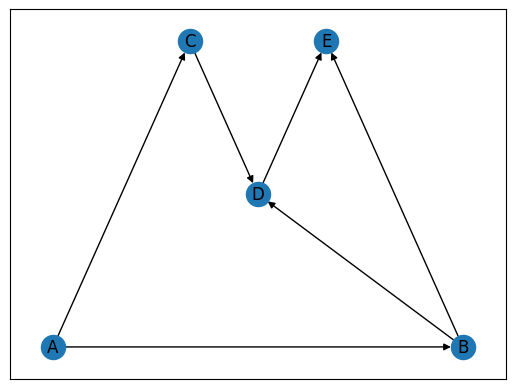

In [5]:
drawDiGraph(graph)

In [6]:
dijkstra_num_paths(graph, 'A')

{'A': 1, 'B': 1, 'C': 1, 'D': 2, 'E': 3}

# Es. 4. Avendo un vettore dei padri risultato di una BFS, verificare in tempo lineare se rimuovere un arco modifica le distanze

**Testo**

Dare lo pseudo-codice di un algoritmo che preso in input un grafo non diretto e connesso G, un suo nodo u, un vettore dei padri P relativo a una BFS da u in G e un arco {v, w} di G, ritorna True se e solo se la rimozione dell’arco {v, w} non cambia le distanze da u. L’algoritmo deve avere complessita’ O(n).

**Idea**

La rimozione di un arco {v, w} modifica le distanze della BFS con radice u quando valgono tutte le seguenti:
1. l’arco {v,w} fa parte dell’albero di visita
2. non esiste nessun arco tra w e un qualsiasi altro nodo alla stessa profondità di v quando v è il padre di w
3. non esiste nessun arco tra v e un qualsiasi altro nodo alla stessa profondità di w quando w è il padre di v


**Soluzione**

In [7]:
def get_H(P, u):
    def set_value(node):
        if H[node-1] == -1:
            H[node-1] = set_value(P[node-1]) + 1
        return H[node-1]
    H = [-1] * len(P)
    H[u-1] = 0
    for node in range(1, len(P)+1):
        set_value(node)
    return H

def check(P, G, u, v, w):
    H = get_H(P, u)
    if H[v-1] < H[w-1]:
        padre, figlio = v, w
    elif H[v-1] > H[w-1]:
        padre, figlio = w, v
    else:
        return False
    if P[figlio-1] == padre:
        for adj in G[figlio]:
            if adj != padre and H[adj-1] == H[padre-1]:
                return False
        return True
    else:
        return False

**Esecuzione**

In [8]:
graph = {
    1 : [2, 3],
    2 : [1, 4, 5],
    3 : [1, 4, 5],
    4 : [2, 3],
    5 : [2, 3]
}

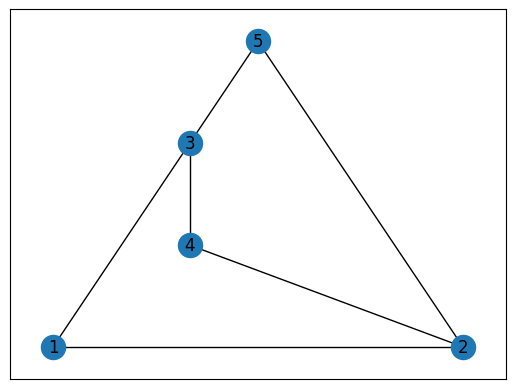

In [9]:
drawGraph(graph)

In [10]:
P = [1, 1, 1, 2, 2]

In [11]:
check(P, graph, 1, 2, 5)

False

In [12]:
check(P, graph, 1, 3, 4)

False

In [13]:
check(P, graph, 1, 1, 3)

True